In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import ensemble  # pakiet z lasami decyzyjnymi
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection


# Data describtion

In [2]:
wine_red = pd.read_csv('winequality-red.csv')
wine_white = pd.read_csv('winequality-white.csv')

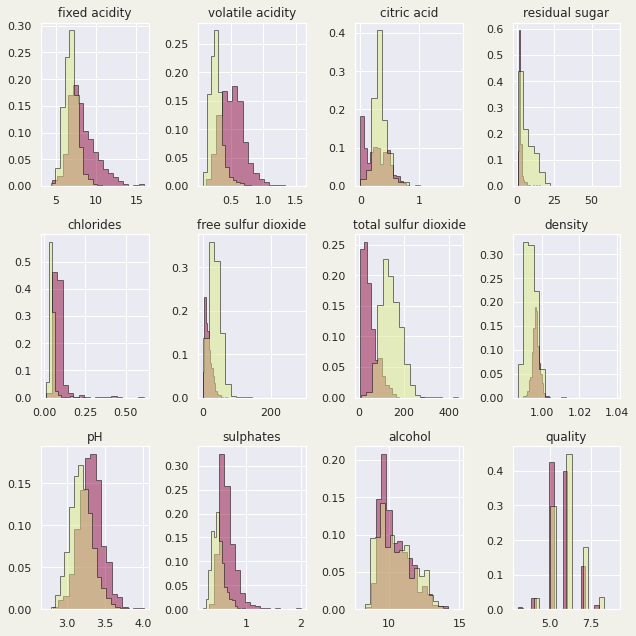

In [3]:
sns.set_style("darkgrid")
sns.set_context("notebook")

fig, axs = plt.subplots(3,4, figsize=(9, 9), facecolor='#F1F0E9', edgecolor='black',tight_layout=True)
fig.subplots_adjust()


axs = axs.ravel()

for i,x in enumerate(wine_red):
    axs[i].hist(wine_red[x],color="#900C3F",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_red[x])) / len(wine_red[x]),histtype="stepfilled")
    axs[i].hist(wine_white[x],color="#DDEB86",bins=18,edgecolor='black',alpha = 0.5,weights=np.ones(len(wine_white[x])) / len(wine_white[x]),histtype="stepfilled")
    axs[i].set_title(x)

In [4]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_red["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
wine_white["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
print(f"Red wine:\n  Is there any null value? - > {wine_red.isnull().values.any()}\n  Is there any na value? - > {wine_red.isna().values.any()}\nWhite wine:\n  Is there any null value? - > {wine_white.isnull().values.any()}\n  Is there any na value? - > {wine_white.isna().values.any()}")

Red wine:
  Is there any null value? - > False
  Is there any na value? - > False
White wine:
  Is there any null value? - > False
  Is there any na value? - > False


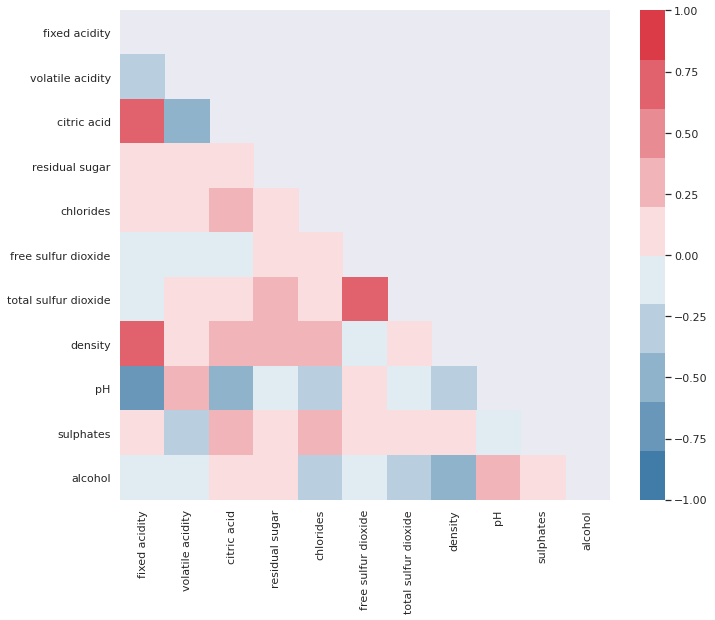

In [9]:
correlation_matrix_red = np.round(wine_red.drop("quality",axis=1).corr(),2)

sns.set(rc={'figure.figsize':(11,9)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(correlation_matrix_red), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(correlation_matrix_red,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

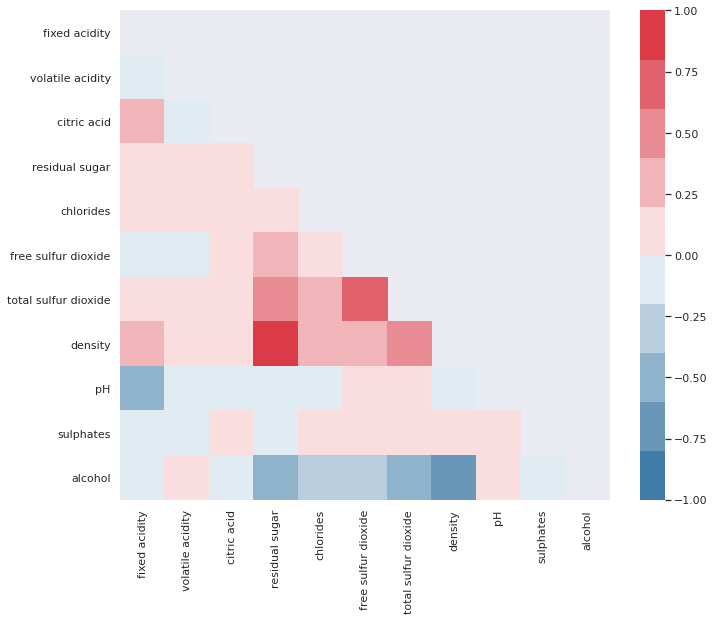

In [10]:
correlation_matrix_white = np.round(wine_white.drop("quality",axis=1).corr(),2)

sns.set(rc={'figure.figsize':(11,9)}) # okrślenie rozmiaru rysunku
color_map = sns.diverging_palette(240, 10, n=10) # wybór mapy kolorów
mask = np.triu(np.ones_like(correlation_matrix_white), k=0) # maska - ukrycie górnej macierzy trójkątnej
sns.heatmap(correlation_matrix_white,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True) # wykonanie wykresu
pass

# Modeling

In [11]:
wine_red.loc[wine_red["quality"] < 6, "quality"] = 0
wine_red.loc[wine_red["quality"] >= 6, "quality"] = 1

wine_white.loc[wine_white["quality"] < 6, "quality"] = 0
wine_white.loc[wine_white["quality"] >= 6, "quality"] = 1


In [12]:
X_red = wine_red.drop("quality",axis=1)
y_red = wine_red["quality"]
X_white = wine_white.drop("quality",axis=1)
y_white = wine_white["quality"]

In [13]:
train_x_red, test_x_red, train_y_red, test_y_red = model_selection.train_test_split(X_red,y_red,random_state=2021,test_size=0.2)
train_x_white, test_x_white, train_y_white, test_y_white = model_selection.train_test_split(X_white,y_white,random_state=2021,test_size=0.2)

In [14]:
# Red wine Random Forest classifier

rf_classifier_red = ensemble.RandomForestClassifier(
    n_estimators = 100, criterion = 'entropy', bootstrap=True)
rf_classifier_red.fit(train_x_red, train_y_red)

# White wine Random Forest classifier

rf_classifier_white = ensemble.RandomForestClassifier(
    n_estimators = 100, criterion = 'entropy', bootstrap=True)
rf_classifier_white.fit(train_x_white, train_y_white)

print(f"Random Forest score:\nRed wine: {rf_classifier_red.score(test_x_red, test_y_red)}\nWhite wine: {rf_classifier_white.score(test_x_white, test_y_white)}")

Random Forest score:
Red wine: 0.803125
White wine: 0.8285714285714286


In [15]:
# Red wine Decision Tree classifier

decision_tree_red = tree.DecisionTreeClassifier(criterion = 'entropy')
decision_tree_red.fit(train_x_red, train_y_red)

# White wine Decision Tree classifier

decision_tree_white = tree.DecisionTreeClassifier(criterion = 'entropy')
decision_tree_white.fit(train_x_white, train_y_white)

print(f"Decision Tree score:\nRed wine: {decision_tree_red.score(test_x_red, test_y_red)}\nWhite wine: {decision_tree_white.score(test_x_white, test_y_white)}")

Decision Tree score:
Red wine: 0.7125
White wine: 0.7959183673469388


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.neighbors import BallTree
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5

# Red wine KNN classifier

knn_red = KNeighborsClassifier(n_neighbors, weights='distance',algorithm='brute',leaf_size=50)
##------------- Normalization pipeline ---------
knn_pipeline_red = make_pipeline(MinMaxScaler(), knn_red)
knn_pipeline_red.fit(train_x_red, train_y_red)
knn_pipeline_red.score(test_x_red,test_y_red)

# Red wine KNN classifier

knn_white = KNeighborsClassifier(n_neighbors, weights='distance',algorithm='brute')
##------------- Normalization pipeline ---------
knn_pipeline_white = make_pipeline(MinMaxScaler(), knn_white)
knn_pipeline_white.fit(train_x_white, train_y_white)
knn_pipeline_white.score(test_x_white,test_y_white)

print(f"KNN pipeline with normalization score:\nRed wine: {knn_pipeline_red.score(test_x_red,test_y_red)}\nWhite wine: {knn_pipeline_white.score(test_x_white,test_y_white)}")

KNN pipeline with normalization score:
Red wine: 0.78125
White wine: 0.8214285714285714


In [54]:
#to jest kurde fajne

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#clf = ExtraTreesClassifier(n_estimators=10,max_depth=None,random_state=0)
#clf.fit(train_x_red,train_y_red)
#clf.score(test_x_red,test_y_red)

bagging = BaggingClassifier(ExtraTreesClassifier(n_estimators=10,max_depth=None),max_samples=1.0, max_features=1.0)

bagging.fit(train_x_white, train_y_white)
bagging.predict_proba(test_x_white)

array([[0.98, 0.02],
       [0.19, 0.81],
       [0.05, 0.95],
       ...,
       [0.08, 0.92],
       [0.53, 0.47],
       [0.01, 0.99]])

In [55]:
test_y_white

1202    0
3389    1
1295    1
3403    0
2558    1
       ..
955     0
4578    1
654     1
2223    1
2864    1
Name: quality, Length: 980, dtype: int64

In [49]:
from sklearn.ensemble import RandomTreesEmbedding

hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
hasher.fit(train_x_white, train_y_white)
hasher.score(test_x_white,test_y_white)

AttributeError: 'RandomTreesEmbedding' object has no attribute 'score'

In [18]:
from yellowbrick.classifier import ClassPredictionError


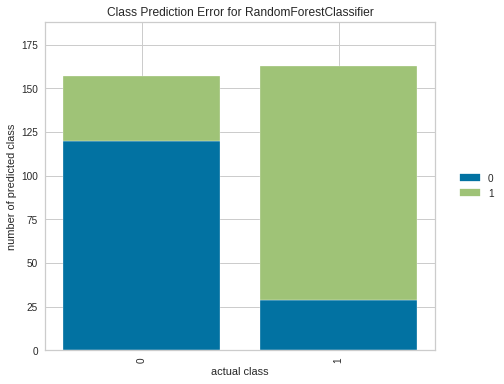

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.datasets import load_credit

X_red = wine_red.drop("quality",axis=1)
y_red = wine_red["quality"]



# Perform 80/20 training/test split
train_x_red, test_x_red, train_y_red, test_y_red = model_selection.train_test_split(X_red,y_red,random_state=2021,test_size=0.2)

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10)
)

# Fit the training data to the visualizer
visualizer.fit(train_x_red, train_y_red)

# Evaluate the model on the test data
visualizer.score(test_x_red, test_y_red)

# Draw visualization
visualizer.show()


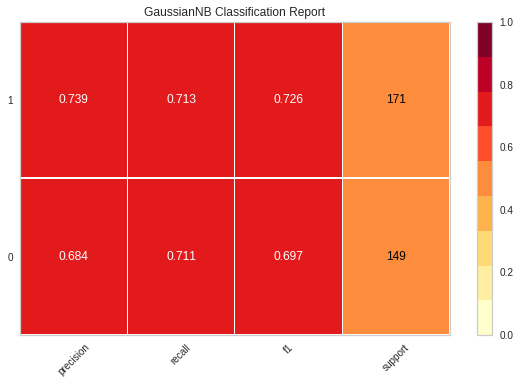

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X_red = wine_red.drop("quality",axis=1)
y_red = wine_red["quality"]


# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, support=True)

visualizer.fit(train_x_red, train_y_red)        # Fit the visualizer and the model
visualizer.score(test_x_red, test_y_red)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


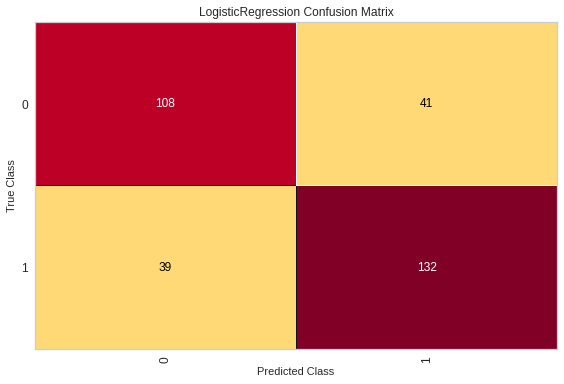

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
X_red = wine_red.drop("quality",axis=1)
y_red = wine_red["quality"]

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(train_x_red, train_y_red)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(test_x_red, test_y_red)

# How did we do?
cm.show()


In [22]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(train_x_white,train_y_white)
clf.score(test_x_white,test_y_white)

0.7948979591836735

In [24]:
import xgboost as xgb

data_dm = xgb.DMatrix(data=X_red.values, label=y_red.values)

params = {
    "objective": "reg:logistic", 
    "max_depth": 3, 
    "booster": "gbtree",
    "learning_rate": 0.005
}

cv_results = xgb.cv(
    dtrain=data_dm, 
    params=params, 
    nfold=4, 
    num_boost_round=100, metrics=["error", "auc"], as_pandas=True) #metrics="auc"
cv_results

,train-error-mean,train-error-std,train-auc-mean,train-auc-std,test-error-mean,test-error-std,test-auc-mean,test-auc-std
0,0.264538,0.019237,0.807205,0.009593,0.310171,0.028336,0.761949,0.019033
1,0.264538,0.019237,0.807631,0.009506,0.310171,0.028336,0.763024,0.018591
2,0.264538,0.019237,0.807951,0.009478,0.310171,0.028336,0.763017,0.018593
3,0.264538,0.019237,0.808084,0.009476,0.310171,0.028336,0.762904,0.018631
4,0.264538,0.019237,0.811383,0.007826,0.310171,0.028336,0.766974,0.024506
...,...,...,...,...,...,...,...,...
95,0.232852,0.007735,0.850055,0.005503,0.277038,0.030600,0.805032,0.029187
96,0.232852,0.007735,0.850056,0.005323,0.277038,0.030600,0.804768,0.029367
97,0.232643,0.007680,0.850265,0.005378,0.277038,0.030600,0.805151,0.029113
98,0.232435,0.007642,0.850361,0.005493,0.277038,0.030600,0.805070,0.029257


In [25]:
#accuracy/average out-of-sample accuracy
print("acc: ", ((1- cv_results["test-error-mean"]).iloc[-1]))

acc:  0.722962
